# Describing Distributions (Core)


In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.

- The features to analyze: 
    - VitD_levels
    - Doc_visits
    - TotalCharge

**For each feature listed:**

1. Plot a histogram with a kde (kernel density estimate)
    1. Add a line for the mean (red)
    2. Add a line for the median (green)
    3. Add a line for for +1 std from the mean (black)
    4. Add a line for the - 1 std from the mean (black)
    5. Highlight the range between +1 and =1 std (yellow)
2. Answer the following questions:
    - Is it Discrete or Continuous?
    - Does it have a skew? If so, which direction (+/-)
    - What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

In [55]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [56]:
df = pd.read_csv(r'Data\data(5).csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [57]:
med_df = df[['VitD_levels', 'Doc_visits', 'TotalCharge']]
med_df.head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


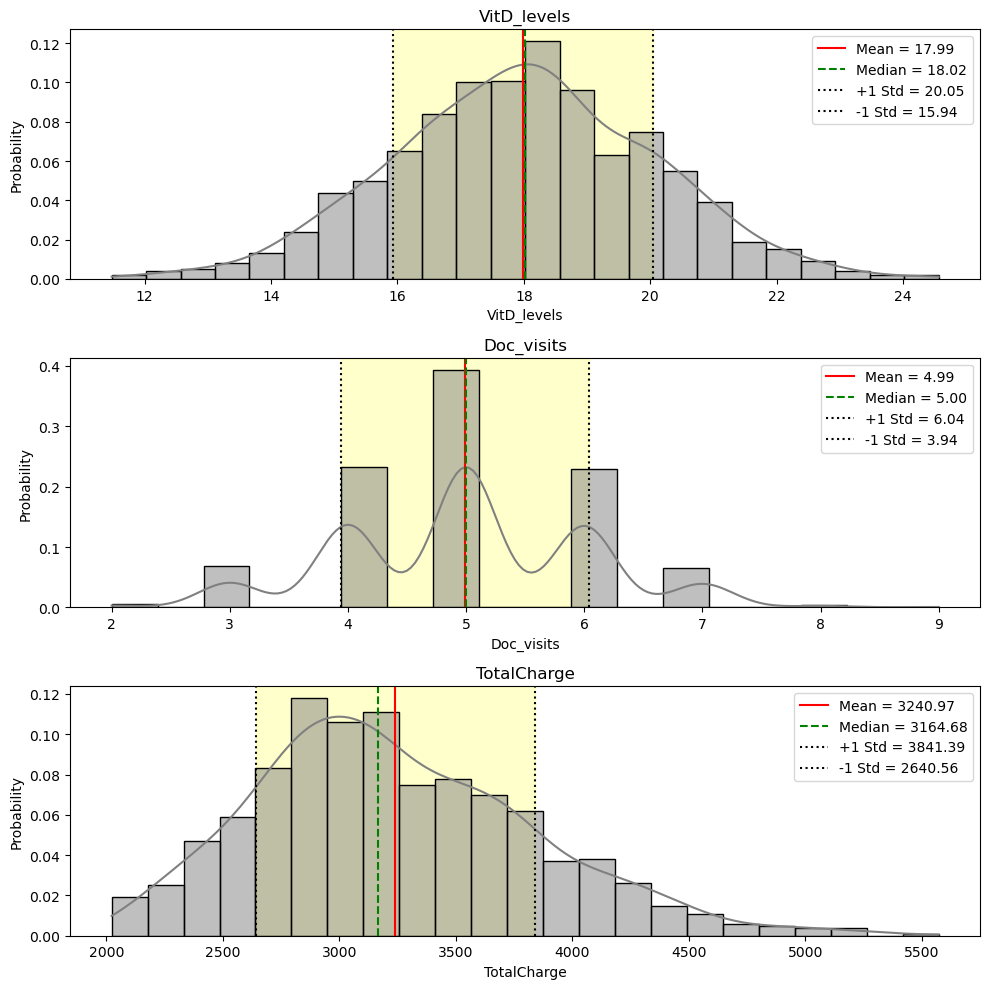

In [58]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
# Using loop to plot the histograms
for i, col in enumerate(med_df.columns):
    feature = med_df[col]
    zscore = (feature - mean) / std
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_std = mean + std
    minus_std = mean - std
    sns.histplot(feature, kde=True, stat='probability', ax=ax[i], color='grey')
    ax[i].axvline(feature.mean(), color='red', label=f'Mean = {mean:.2f}')
    ax[i].axvline(feature.median(), color='green', linestyle='--', label=f'Median = {median:.2f}')
    ax[i].axvline(plus_std, color='black', linestyle=':', label=f'+1 Std = {plus_std:.2f}')
    ax[i].axvline(minus_std, color='black', linestyle=':', label=f'-1 Std = {minus_std:.2f}')
    ax[i].axvspan(plus_std, minus_std, alpha=0.2, color='yellow', zorder=0)
    ax[i].set_title(col)
    ax[i].set_ylabel('Probability')
    ax[i].legend()
plt.tight_layout()
plt.show()


1. Is it Discrete or Continuous?

### VitD_levels
Since the bars in the histogram does not apear to contain gaps in between each bar. This would be a telltale that this is a continuous distrobution

### Doc_visits
Since the bars in the Doc_visits graph above appear to contain gaps in between each bar. This would indicate that this column contains a discrete distrobution.

### TotalCharge
Since this graph contains bars without any gaps in between each bar, this is clearly a continous distrobution.

2. Does it have a skew? If so, which direction (+/-)

### VitD_levels
In this column, since the mean is smaller than the median by 0.03. The values are skewed to the right, causing the values the be negatively skewed.

### Doc_visits
This columnn is almost by 0.01 away from having no skew appearing in this column. However, since the mean is smaller than the median the values are slightly skewed negatively.

### TotalCharge
Total charge is skewed in a positive direction. The reason being since the median is smaller than the mean, the values in the columns shift is a positive direction.

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)?

In [59]:
# creating a list of the kurtosis values
kurt_total = stats.kurtosis(med_df['TotalCharge'], fisher=False)
kurt_doc = stats.kurtosis(med_df['Doc_visits'], fisher=False)
kurt_vitd = stats.kurtosis(med_df['VitD_levels'], fisher=False)
# creating a list of the kurtosis values
list = [kurt_total, kurt_doc, kurt_vitd]
# printing the kurtosis values and the type of distribution for each column in the dataframe using a loop and if statements
for i, col in enumerate(med_df.columns):
    print(f'{col} kurtosis is {list[i]:.2f}')
    if list[i] > 3:
        print(f'{col} is leptokurtic')
    if list[i] < 3:
        print(f'{col} is platykurtic')
    if list[i] == 3:
        print(f'{col} is mesokurtic')



VitD_levels kurtosis is 3.27
VitD_levels is leptokurtic
Doc_visits kurtosis is 2.99
Doc_visits is platykurtic
TotalCharge kurtosis is 3.01
TotalCharge is leptokurtic
